# Bode plot for inverting OPA [gain 1] and [gain 10]

In [695]:
import pandas as pd
from utilities import * # My functions: pair_dat_err, uncertainties_to_root_graph_errors
from uncertainties import umath
import ROOT
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

DATADIR = "../data-source"
OUTPUTDIR = "./output"

# Gain 2

### Read DataFrames

In [696]:
df_data = pd.read_csv("../data-source/4-10-21/inverting_gain/inverting_gain_1_data.csv")
df_errors = pd.read_csv("../data-source/4-10-21/inverting_gain/inverting_gain_1_errors.csv")

### Convert to arrays of uncertainties

In [697]:
index=[28,29]
df_errors_n = df_errors.drop(index)
df_data_n = df_data.drop(index)
f_arr = pair_dat_err(df_data_n['f'], df_errors_n['f'])
ppch1_arr = pair_dat_err(df_data_n['PPch1'], df_errors_n['PPch1'])
ppch2_arr = pair_dat_err(df_data_n['PPch2'], df_errors_n['PPch2'])

### Calculate Gain

In [698]:
gains_arr = ppch2_arr / ppch1_arr
db_gains_arr = list(map(lambda x: 20 * umath.log(x), gains_arr))


### Canvas

In [699]:
canvas = ROOT.TCanvas("c1", "bode gain 1", 1000, 500)

canvas.SetLogx(True)

### GraphErrors

In [700]:
#bode_graph_err = uncertainties_to_root_graph_errors(f_arr, gains_arr)
bode_graph_err = uncertainties_to_root_graph_errors(f_arr, db_gains_arr)

bode_graph_err.SetTitle("Bode Gain 1")
bode_graph_err.GetXaxis().SetTitle("f [Hz]")
bode_graph_err.GetYaxis().SetTitle("G [dB]")
bode_graph_err.SetMarkerStyle(21)
bode_graph_err.SetMarkerSize(0.4)

### Fit [TODO]

In [701]:
#function = "1/[0]*(1-1/[0]*exp(x/[0]))"



In [702]:
function = "[1]*(1/sqrt(1+pow(x/[0],2))-1)"
fit_f = ROOT.TF1("fit1", function)
###parameter per low pass filter
fit_f.SetParName(0, "Gain")
fit_f.SetParameter(0, 2.1*10**6)
fit_f.SetParName(1, "Tau")
fit_f.SetParLimits(0,10**6,4*10**6)
fit_f.SetParLimits(1,40,500)

In [703]:
function = "-[1]/[0]*exp(x/[0])"
fit_f = ROOT.TF1("fit1", function)
###parameter per low pass filter
#fit_f.SetParName(0, "pole")
#fit_f.SetParameter(0, 10**4)
#fit_f.SetParameter(1, 10**3)

#fit_f.SetParLimits(0,10**4,4*10**4)
fit_f.SetParLimits(1,1,10**3)

In [704]:

fit_f.SetLineColor(4)

### Draw

 FCN=1762.49 FROM MIGRAD    STATUS=FAILED        102 CALLS         103 TOTAL
                     EDM=-nan    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -3.00000e-03   0.00000e+00          -nan           inf
   2  p1           5.00500e+02   7.46195e+02          -nan   0.00000e+00


Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Warning in <Fit>: Abnormal termination of minimization.


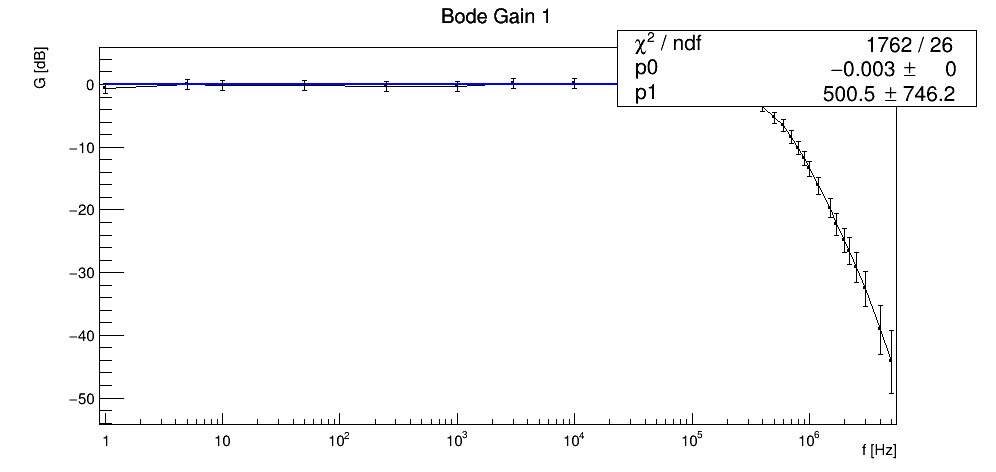

In [705]:
canvas.Draw()
bode_graph_err.Draw()
bode_graph_err.Fit(fit_f, "MSE")

 FCN=4459.37 FROM MINOS     STATUS=SUCCESSFUL      4 CALLS          66 TOTAL
                     EDM=7.10316e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  1st pole     8.49223e+03   2.59440e+01   2.59440e+01  -1.45279e-06


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


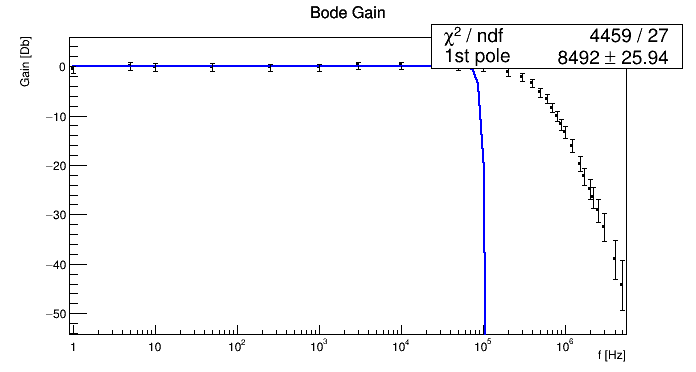

In [706]:
###fit Bode
from uncertainties import umath

canvas = ROOT.TCanvas("c1", "Bode Gain ", 700, 400)
canvas.SetLogx(True)

fit_bode_graph_err = uncertainties_to_root_graph_errors(f_arr, db_gains_arr)
fit_bode_graph_err.SetTitle("Bode Gain")
fit_bode_graph_err.GetXaxis().SetTitle("f [Hz]")
fit_bode_graph_err.GetYaxis().SetTitle("Gain [Db]")
fit_bode_graph_err.SetMarkerStyle(21)
fit_bode_graph_err.SetMarkerSize(0.4)

function_formula = "-1/[0]*exp(x/[0])"
fit_f = ROOT.TF1("fit1", function_formula)
fit_f.SetLineColor(4)
fit_f.SetParameter(0, 10**4)
fit_f.SetParName(0, "1st pole")
ROOT.gStyle.SetOptFit(True)

canvas.Draw()
fit_bode_graph_err.Draw("ap")
fit_bode_graph_err.Fit(fit_f, "MSE")

In [707]:
###prova scipy

In [708]:
ppch1_Arr = df_data_n['PPch1']
ppch2_Arr = df_data_n['PPch2']
gain_Arr = ppch2_Arr/ppch1_Arr
db_gain_Arr = list(map(lambda x: 20 * umath.log(x), gain_Arr))
#gain_Arr_errors = ((df_errors_n['PPch2']/ppch1_Arr)**2 + (ppch2_Arr/(ppch1_Arr)**2*df_errors_n['PPch1'])**2)  
#db_gain_Arr_errors = list(map(lambda x: 20 * umath.log(x), gain_Arr_errors))  
db_gain_Arr_errors = [0.03684758954264483,
       0.039283710065919304,
       0.03835133389809924,
       0.03914754592788334,
       0.03901186037067261,
       0.03901186037067261,
       0.03997751897888523,
       0.03997751897888523,
       0.039837001756988594,
       0.03955745430931493,
       0.03769900245103452,
       0.037049877943686936,
       0.03605169119015721,
       0.034530093684402983,
       0.03374667600547776,
       0.03278928198188431,
       0.03198910465357108,
       0.03133121936398775,
       0.03056472037572376,
       0.029797429860808376,
       0.02884568700100156,
       0.02824879639382313,
       0.028320177622922913,
       0.027958978045571105,
       0.02774748964548574,
       0.027728198334187222,
       0.02748193286061937,
       0.02756128649688445]


H(s) = TransferFunctionContinuous(
array([6.36315856e+17]),
array([1.000e+00, 2.950e+06, 2.565e+12, 6.480e+17]),
dt: None
)


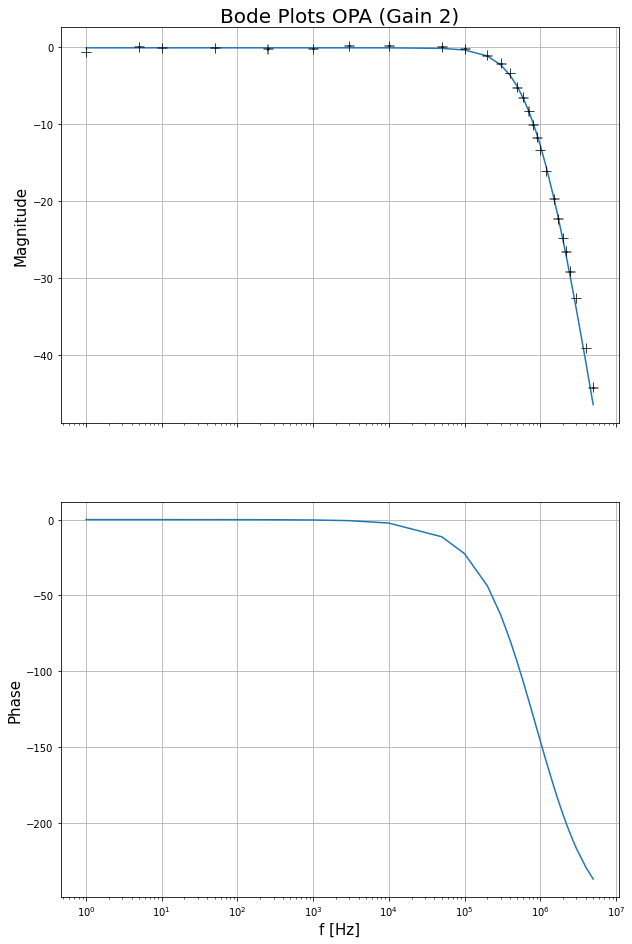

<Figure size 432x288 with 0 Axes>

In [734]:
k=11.15**17
a=4.5*10**5
b=.9*10**6
c=1.6*10**6
num = np.array([k]) #zeros(increase 20 db)
den = np.array([1,a+b+c,a*b+c*a+c*b,a*b*c]) #poles (decreases 20 db) [1,a+b+c,ab+ca+cb,abc]  (as+1)(bs+1)(cs+1)=(1+(a+b)s+abs^2)(cs+1)=(1+(a+b+c)s+(ab+c(a+b))s^2+abcs^3)
H = signal.TransferFunction(num, den)
print ('H(s) =', H)
f, mag, phase = H.bode(df_data_n['f']) #df_data_n['f'] 

plt.figure(figsize=((10,16)))


ax1 = plt.subplot(211)
plt.semilogx(f, mag) # Magnitude Plot
plt.title('Bode Plots OPA (Gain 2)',fontsize=20)
plt.ylabel('Magnitude',fontsize=15)

plt.grid()
plt.errorbar( df_data_n['f'],db_gain_Arr ,xerr = df_errors_n['f'],yerr = db_gain_Arr_errors, fmt='o', color='Black', elinewidth=3,capthick=0.5,errorevery=1, alpha=1, ms=0, capsize = 5)
plt.setp(ax1.get_xticklabels(), visible=False)

plt.subplot(212, sharex = ax1)
plt.ylabel('Phase',fontsize=15)
plt.xlabel('f [Hz]',fontsize=15)
plt.semilogx(f, phase)
plt.grid()


plt.show()


plt.savefig(f"{OUTPUTDIR}/OPA-bode_gain2(mag+phase).pdf")



In [735]:
mag-db_gain_Arr

array([ 0.5154191 , -0.15804521, -0.02152591, -0.01867189,  0.12167785,
        0.12165113, -0.2986532 , -0.30124657, -0.22895614, -0.15391149,
       -0.09052652, -0.17870179, -0.27877763,  0.07930223, -0.17053206,
        0.07199382,  0.27797215,  0.43120478,  0.58694545,  0.51311385,
        0.22368613,  0.44869543, -0.28642698, -0.59509529, -0.77851713,
       -1.51072777, -1.85423024, -2.24129551])

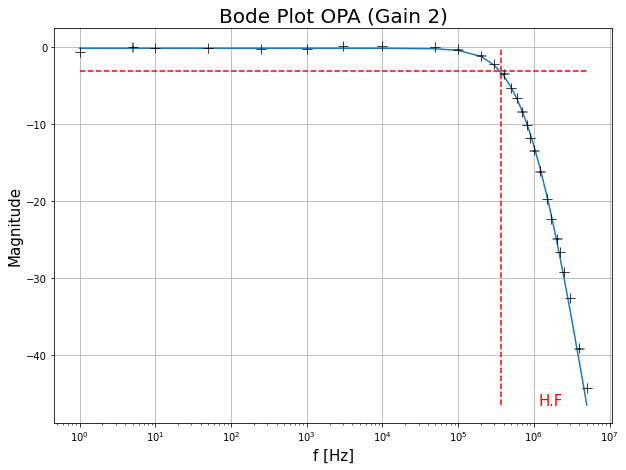

In [737]:
plt.figure(figsize=((10,16)))

fH_1 = 363806.37705038

ax1 = plt.subplot(211)
plt.semilogx(f, mag) # Magnitude Plot
plt.title('Bode Plot OPA (Gain 2)',fontsize=20)
plt.ylabel('Magnitude',fontsize=15)
plt.xlabel('f [Hz]',fontsize=15)
plt.grid()
plt.errorbar( df_data_n['f'],db_gain_Arr ,xerr = df_errors_n['f'],yerr = db_gain_Arr_errors, fmt='o', color='Black', elinewidth=3,capthick=0.5,errorevery=1, alpha=1, ms=0, capsize = 5)
plt.vlines(fH_1, mag[27],  mag[0], linestyles="--", color = "red")
plt.hlines(-0.15804521-3,f[0],f[27], linestyles="--", color = "red")
plt.text(fL+100000, -45, 'H.F', verticalalignment='top', horizontalalignment='left', color='red', fontsize=15)

plt.savefig(f"{OUTPUTDIR}/OPA-bode_gain2(mag).pdf")






In [724]:
###Calcolo band width
mag_BW = mag - mag[27]
mag
#f[18]
#print(np.where(mag_BW>(mag_BW[0]/umath.sqrt(2)-0.5) and mag_BW>(mag_BW[0]/umath.sqrt(2)+0.5) ))
#print(np.where(mag_BW==45.60653209996797))
#f[np.where(mag_BW==45.60653209996797)]

array([ -0.16089512,  -0.16132181,  -0.16181238,  -0.16237637,
        -0.16302477,  -0.16377019,  -0.16462716,  -0.16561233,
        -0.16674488,  -0.16804681,  -0.16954342,  -0.17126377,
        -0.17324125,  -0.1755142 ,  -0.17812665,  -0.18112916,
        -0.18457976,  -0.18854508,  -0.19310152,  -0.19833676,
        -0.20435131,  -0.21126037,  -0.21919592,  -0.22830909,
        -0.23877278,  -0.25078475,  -0.26457091,  -0.28038917,
        -0.29853362,  -0.31933921,  -0.3431869 ,  -0.3705093 ,
        -0.40179682,  -0.43760419,  -0.47855752,  -0.52536157,
        -0.57880729,  -0.63977936,  -0.70926353,  -0.78835349,
        -0.87825685,  -0.98029987,  -1.09593046,  -1.22671885,
        -1.37435558,  -1.54064616,  -1.72750213,  -1.93692827,
        -2.17100586,  -2.43187242,  -2.72169818,  -3.04266043,
        -3.3969165 ,  -3.78657669,  -4.21367829,  -4.68016161,
        -5.18784888,  -5.73842615,  -6.33342838,  -6.97422706,
        -7.66201992,  -8.39782191,  -9.18245699, -10.01

In [731]:
-0.15804521-3
(f[51]+f[52])/2

363806.37705038

In [645]:
###how to get bode plot

#num = np.array([1]) #zeros(increase 20 db)
#den = np.array([1/10**6,1]) #poles (decreases 20 db)
#H = signal.TransferFunction(num, den)
#print ('H(s) =', H)
#f, mag, phase = signal.bode(H)
#plt.figure()
#plt.semilogx(f, mag) # Magnitude Plot
#plt.grid()
#plt.figure()
#plt.semilogx(f, phase) # Phase plot
#plt.show()
#len(f)

# Gain 10

In [738]:
df_data = pd.read_csv("../data-source/4-10-21/inverting_gain/inverting_gain_10_data.csv")
df_errors = pd.read_csv("../data-source/4-10-21/inverting_gain/inverting_gain_10_errors.csv")
len(df_data)

29

### Convert to arrays of uncertainties

In [739]:
index=[27,28]
df_errors_n = df_errors.drop(index)
df_data_n = df_data.drop(index)
f_arr = pair_dat_err(df_data_n['f'], df_errors_n['f'])
ppch1_arr = pair_dat_err(df_data_n['PPch1'], df_errors_n['PPch1'])
ppch2_arr = pair_dat_err(df_data_n['PPch2'], df_errors_n['PPch2'])

### Calculate Gain

In [740]:
gains_arr = ppch2_arr / ppch1_arr
db_gains_arr = list(map(lambda x: 20 * umath.log(x), gains_arr))


### Canvas

In [741]:
canvas = ROOT.TCanvas("c2", "bode gain 10", 1000, 500)

canvas.SetLogx(True)

### GraphErrors

In [742]:
#bode_graph_err = uncertainties_to_root_graph_errors(f_arr, gains_arr)
bode_graph_err = uncertainties_to_root_graph_errors(f_arr, db_gains_arr)

bode_graph_err.SetTitle("Bode Gain 10")
bode_graph_err.GetXaxis().SetTitle("f [Hz]")
bode_graph_err.GetYaxis().SetTitle("G [dB]")
bode_graph_err.SetMarkerStyle(21)
bode_graph_err.SetMarkerSize(0.4)

### Fit

In [743]:
function = "[0]/[1]*exp(x/[1])"
#function = "1/sqrt(1+pow(x/[0],2))-1"
fit_f.SetParameter(0,-40)
fit_f.SetParameter(1,10**4)
fit_f = ROOT.TF1("fit1", function)

### Draw Graph

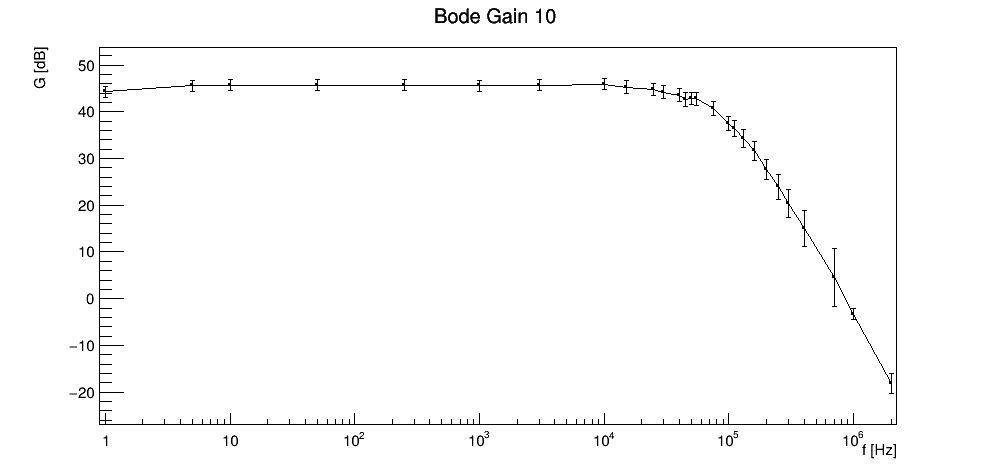

In [744]:
canvas.Draw()
bode_graph_err.Draw()
#bode_graph_err.Fit(fit_f, "MSE")

In [745]:
ppch1_Arr = df_data_n['PPch1']
ppch2_Arr = df_data_n['PPch2']
gain_Arr = ppch2_Arr/ppch1_Arr
db_gain_Arr = list(map(lambda x: 20 * umath.log(x), gain_Arr))
#gain_Arr_errors = ((df_errors_n['PPch2']/ppch1_Arr)**2 + (ppch2_Arr/(ppch1_Arr)**2*df_errors_n['PPch1'])**2)  
#db_gain_Arr_errors = list(map(lambda x: 20 * umath.log(x), gain_Arr_errors))  
db_gain_Arr_errors =[1.1392457132682507,
 1.1837220472419332,
 1.188540648949798,
 1.188540648949798,
 1.188540648949798,
 1.1837220472419332,
 1.188540648949798,
 1.1934610377512482,
 1.359037133424585,
 1.3176413192753962,
 1.4402533545665437,
 1.3894688477333736,
 1.4518975960816864,
 1.2749938684161681,
 1.394043130412572,
 1.4978917988567928,
 1.5117277459614,
 1.6804651171340652,
 1.874538847640011,
 2.0593634245686667,
 2.154065922853802,
 2.7715251078656085,
 2.9649038395440215,
 3.785837971284672,
 6.299019607843137,
 1.2250829359246014,
 2.114725655155385]

# 6.714495099740892,
# 33.34952100333063

H(s) = TransferFunctionContinuous(
array([5.77951263e+17]),
array([1.0000e+00, 5.6500e+05, 7.5900e+10, 2.9835e+15]),
dt: None
)


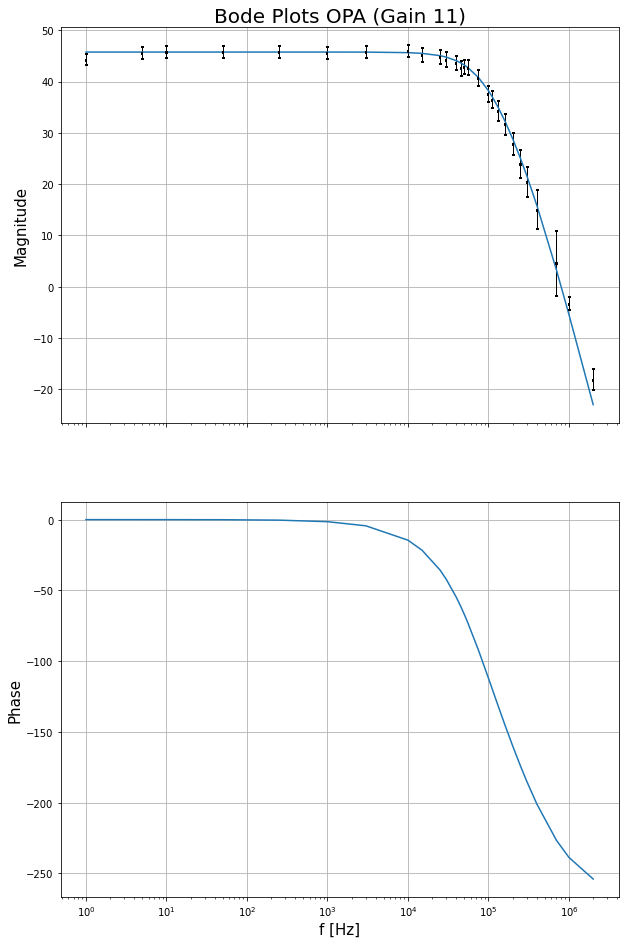

<Figure size 432x288 with 0 Axes>

In [766]:
#k=9.8**18
#a=0.4*10**5
#b=1.2*10**5
#c=3.5*10**5

k=9.7**18
a=0.85*10**5
b=0.9*10**5
c=3.9*10**5
num = np.array([k]) #zeros(increase 20 db)
den = np.array([1,a+b+c,a*b+c*a+c*b,a*b*c]) #poles (decreases 20 db) [1,a+b+c,a*b+c*a+c*b,a*b*c]  (as+1)(bs+1)(cs+1)=(1+(a+b)s+abs^2)(cs+1)=(1+(a+b+c)s+(ab+c(a+b))s^2+abcs^3)
H = signal.TransferFunction(num, den)
print ('H(s) =', H)
f_11, mag_11, phase_11 = H.bode(df_data_n['f']) #

plt.figure(figsize=((10,16)))


ax1 = plt.subplot(211)
plt.semilogx(f_11, mag_11) # Magnitude Plot
plt.title('Bode Plots OPA (Gain 11)',fontsize=20)
plt.ylabel('Magnitude',fontsize=15)

plt.grid()
plt.errorbar( df_data_n['f'],db_gain_Arr ,xerr = df_errors_n['f'],yerr = db_gain_Arr_errors, fmt='o', color='Black', elinewidth=1,capthick=2,errorevery=1, alpha=1, ms=0, capsize = 1.5)
plt.setp(ax1.get_xticklabels(), visible=False)

plt.subplot(212, sharex = ax1)
plt.ylabel('Phase',fontsize=15)
plt.xlabel('f [Hz]',fontsize=15)
plt.semilogx(f_11, phase_11)
plt.grid()


plt.show()

plt.savefig(f"{OUTPUTDIR}/OPA-bode_gain11(mag+phase).pdf")



In [767]:
mag_11-db_gain_Arr

array([ 1.45982078,  0.19372003,  0.02774388,  0.02774108,  0.02767114,
        0.19255431,  0.01725768, -0.25546149,  0.24944535,  0.29345626,
        0.5272335 ,  0.48858889,  1.05240722,  0.38330397,  0.03377406,
        0.13623365,  0.67676814,  0.69553376,  0.89531216,  0.66182494,
        1.11349304,  1.09481243,  1.21002512,  0.80008558, -1.31804636,
       -2.13467387, -4.87390777])

In [768]:
mag_11-db_gain_Arr

array([ 1.45982078,  0.19372003,  0.02774388,  0.02774108,  0.02767114,
        0.19255431,  0.01725768, -0.25546149,  0.24944535,  0.29345626,
        0.5272335 ,  0.48858889,  1.05240722,  0.38330397,  0.03377406,
        0.13623365,  0.67676814,  0.69553376,  0.89531216,  0.66182494,
        1.11349304,  1.09481243,  1.21002512,  0.80008558, -1.31804636,
       -2.13467387, -4.87390777])

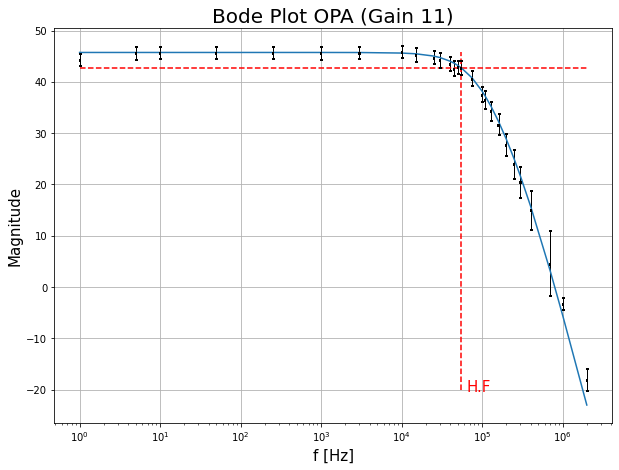

<Figure size 432x288 with 0 Axes>

In [771]:
plt.figure(figsize=((10,16)))

fH_11 = 54622.77217684337

ax1 = plt.subplot(211)
plt.semilogx(f_11, mag_11) # Magnitude Plot
plt.title('Bode Plot OPA (Gain 11)',fontsize=20)
plt.ylabel('Magnitude',fontsize=15)
plt.xlabel('f [Hz]',fontsize=15)
plt.grid()
plt.errorbar(df_data_n['f'],db_gain_Arr ,xerr = df_errors_n['f'],yerr = db_gain_Arr_errors , fmt='o', color='Black', elinewidth=1,capthick=2,errorevery=1, alpha=1, ms=0, capsize = 1.5)
plt.vlines(fH_11, -20,  mag_11[0], linestyles="--", color = "red")
plt.hlines(45.74330349-3,f_11[0],f_11[26], linestyles="--", color = "red")

plt.text(fH_11+10000, -18, 'H.F',
        verticalalignment='top', horizontalalignment='left',
        color='red', fontsize=15)
plt.show()

plt.savefig(f"{OUTPUTDIR}/OPA-bode_gain11(mag).pdf")

In [772]:

#f, mag, phase = H.bode() 
mag_BW = mag_11 - mag_11[26]
mag_11

array([ 45.74330349,  45.74330346,  45.74330338,  45.74330058,
        45.74323063,  45.74213775,  45.73281718,  45.627463  ,
        45.48470732,  45.04237207,  44.75025124,  44.04622118,
        43.64372579,  43.21377469,  42.76076754,  40.79466417,
        38.20161613,  37.16938409,  35.15488398,  32.3026037 ,
        28.83938026,  24.99959492,  21.60340685,  15.80619747,
         3.22310266,  -5.44337854, -23.00267648])

In [773]:
45.74330349-3
mag_11[43]
f_11[43]

IndexError: index 43 is out of bounds for axis 0 with size 27

In [774]:
mag_BW[24]
print(np.where(mag_BW==84.75575792647965))
f[np.where(mag_BW==84.75575792647965)]
f_11[19]

(array([], dtype=int64),)


160000

In [775]:
700000
(f[24]+f[25])/2

2750000.0

In [776]:
###Control BW*Gain
fH_1*2

727612.75410076

In [777]:
fH_11*11

600850.4939452771

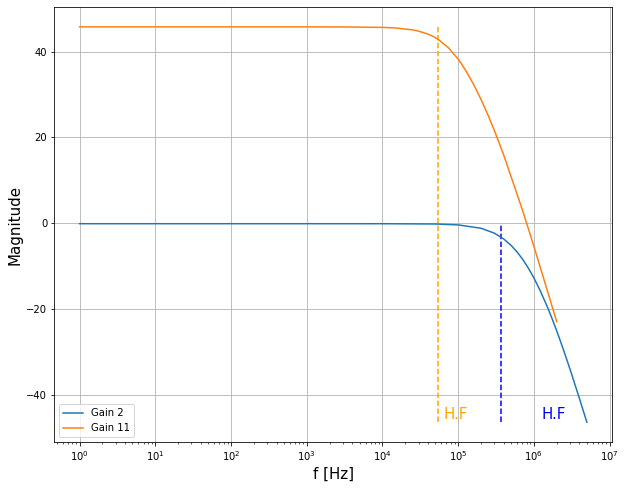

<Figure size 432x288 with 0 Axes>

In [778]:
###plot gain 1 + gain 11
plt.figure(figsize=((10,8)))
plt.ylabel('Magnitude',fontsize=15)
plt.xlabel('f [Hz]',fontsize=15)
plt.semilogx(f, mag, label='Gain 2')
plt.semilogx(f_11, mag_11,label='Gain 11')
plt.vlines(fH_1, mag[27],  mag[0], linestyles="--", color = "blue")
plt.text(fL+200000, -43, 'H.F',
        verticalalignment='top', horizontalalignment='left',
        color='blue', fontsize=15)
plt.vlines(fH_11, mag[27],  mag_11[0], linestyles="--", color = "orange")
plt.text(fH_11+10000, -43, 'H.F',
        verticalalignment='top', horizontalalignment='left',
        color='orange', fontsize=15)
plt.grid()
plt.legend(loc = "lower left")
plt.show()
plt.savefig(f"{OUTPUTDIR}/OPA-bode_gain_comparison(mag).pdf")